# Population and samples in statistics

## Libraries and settings

In [11]:
# Libraries
import os
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## WEIGHT OF DOGS (simulated data)

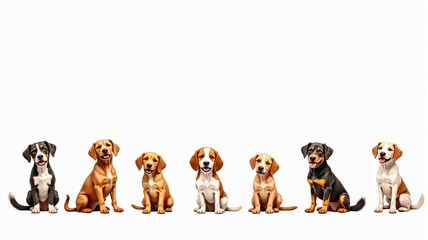

In [12]:
Image("dogs.png", width=800)

Population size: 30000
Mean: 17.998
Std: 4.993


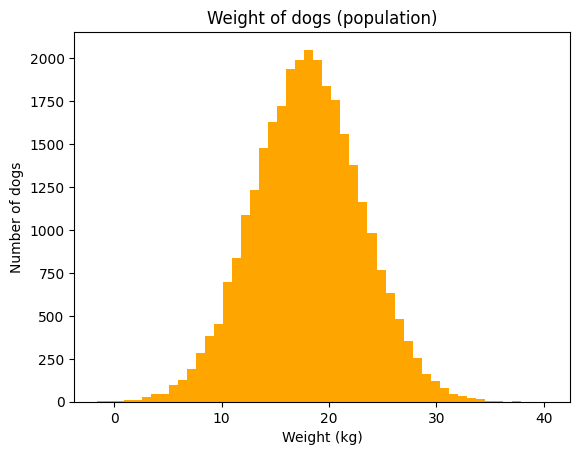

In [13]:
# Parameters of distribution
p_mean = 18        # mean dog weight in kg
p_std = 5          # standard deviation in kg
p_n = 30000        # size of population

# Setting a seed to restore the random numbers later
np.random.seed(42)

pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

print(f'Population size: {len(pop)}')
print(f'Mean: {np.mean(pop):.3f}')
print(f'Std: {np.std(pop):.3f}')

plt.hist(pop, bins=50, color='orange')
plt.title('Weight of dogs (population)')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of dogs')
plt.show()

## Single random sample from the population

Sample mean: 17.488
Sample std: 5.066


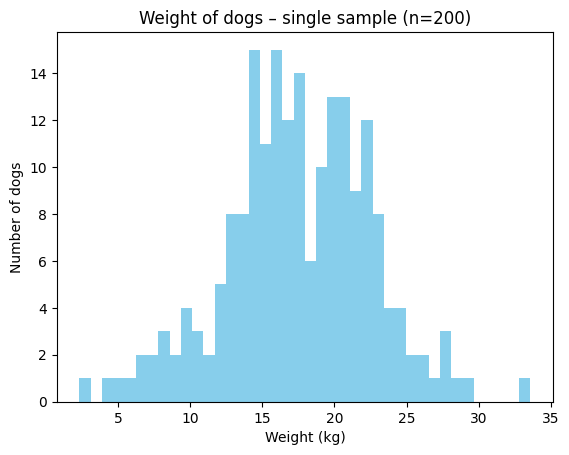

In [14]:
sample_size = 200
random.seed(42)

random_sample = random.sample(list(pop), sample_size)

print(f"Sample mean: {statistics.mean(random_sample):.3f}")
print(f"Sample std: {statistics.stdev(random_sample):.3f}")

plt.hist(random_sample, bins=40, color='skyblue')
plt.title(f'Weight of dogs – single sample (n={sample_size})')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of dogs')
plt.show()

## Repeated random sampling 'with replacement' (bootstrapping)

179.9886
24.9897


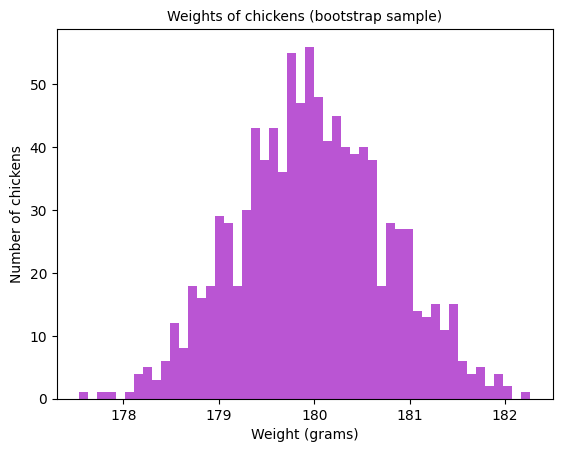

In [15]:
def bootstrap(p_mean = 18, p_std = 5, p_n =30000, num_iter = 2000, sample_size = 00):
    """
    Creates bootstrap sample from a distribution.

    :param p_mean population mean. Type = int, float
    :param p_std: Type = int, float
    :param p_n: Type = int, float
    :param num_iter: number of iterations. Type = int
    :param sample_size: size of single bootstrap sample. Type = int
    :return: plot of bootstrap sample.
    """

    # Setting a seed to restore the random numbers later
    np.random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std  = []

    # Loop for iterations
    for i in range(num_iter):
        samp = np.random.choice(pop, size=sample_size, replace=True)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and sd of bootsstapped distribution
    print(f'{np.mean(sample_mean):.4f}')
    print(f'{np.mean(sample_std):.4f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins = 50, color='mediumorchid')
    plt.title('Weights of chickens (bootstrap sample)', fontsize=10)
    plt.xlabel('Weight (grams)')
    plt.ylabel('Number of chickens')
    plt.show()

# Function call
bootstrap(p_mean=180, p_std=25, num_iter = 1000, sample_size = 1000)


17.9979
4.9812


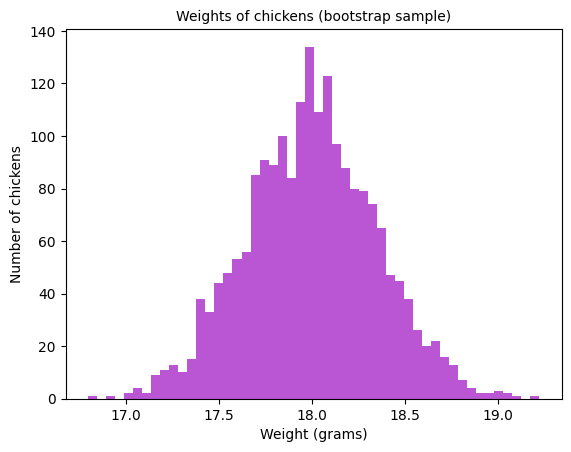

In [16]:
def bootstrap(p_mean = 18, p_std = 5, p_n =30000, num_iter = 2000, sample_size = 300):
    """
    Creates bootstrap sample from a distribution.

    :param p_mean population mean. Type = int, float
    :param p_std: Type = int, float
    :param p_n: Type = int, float
    :param num_iter: number of iterations. Type = int
    :param sample_size: size of single bootstrap sample. Type = int
    :return: plot of bootstrap sample.
    """

    # Setting a seed to restore the random numbers later
    np.random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std  = []

    # Loop for iterations
    for i in range(num_iter):
        samp = np.random.choice(pop, size=sample_size, replace=True)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and sd of bootsstapped distribution
    print(f'{np.mean(sample_mean):.4f}')
    print(f'{np.mean(sample_std):.4f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins = 50, color='mediumorchid')
    plt.title('Weights of chickens (bootstrap sample)', fontsize=10)
    plt.xlabel('Weight (grams)')
    plt.ylabel('Number of chickens')
    plt.show()

# Function call
bootstrap(p_mean=18, p_std=5, p_n=30000, num_iter=2000, sample_size=200)


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [17]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-30 23:14:13
Python Version: 3.11.14
-----------------------------------
